# Q1

# Q1

For any positive integer $n$, consider the European "power put" payoff

$$
G_n(x) = H_n(e^x) = [(K - e^x)^+]^n
$$

## (a) Shifted/modulated Fourier transform $\widehat G_n(\omega - i\beta)$

By definition,

$$
\widehat G_n(\omega - i\beta) = \int_{-\infty}^{+\infty} G_n(x) e^{-i(\omega - i\beta)x} dx
$$

Since $(K-e^x)^+ = 0$ when $x > \log K$ and $(K-e^x)^+ = K-e^x$ when $x \le \log K$, we have

$$
\widehat G_n(\omega - i\beta) = \int_{-\infty}^{\log K} (K-e^x)^n e^{-i(\omega - i\beta)x} dx = \int_{-\infty}^{\log K} (K-e^x)^n e^{(-i\omega-\beta)x} dx
$$

Use the binomial expansion:

$$
(K-e^x)^n = \sum_{j=0}^n \binom{n}{j} K^{n-j}(-1)^j e^{jx}
$$

Substitute into the integral:

$$
\widehat G_n(\omega - i\beta) = \sum_{j=0}^n \binom{n}{j} K^{n-j}(-1)^j \int_{-\infty}^{\log K} e^{(j - i\omega - \beta)x} dx
$$

The inner integral is

$$
\int_{-\infty}^{\log K} e^{(j - i\omega - \beta)x} dx = \left. \frac{e^{(j - i\omega - \beta)x}}{j - i\omega - \beta} \right|_{x=-\infty}^{x=\log K}
$$

which converges if and only if

$$
\Re(j - i\omega - \beta) > 0
$$

Writing $\omega = u + iv$ with $u,v \in \mathbb{R}$,

$$
j - i\omega - \beta = j - \beta - iu + v, \quad \Re(j - i\omega - \beta) = j - \beta + v
$$

For all $j=0,\dots,n$, this is guaranteed whenever

$$
v > \beta
$$

In particular, for real $\omega$ (i.e., $v=0$), we require

$$
0 > \beta \quad \Longleftrightarrow \quad \beta < 0
$$

Under this condition, the $x \to -\infty$ endpoint vanishes and we obtain

$$
\int_{-\infty}^{\log K} e^{(j - i\omega - \beta)x} dx = \frac{K^{j - i\omega - \beta}}{j - i\omega - \beta}
$$

Therefore,

$$
\widehat G_n(\omega - i\beta) = \sum_{j=0}^n \binom{n}{j} K^{n-j}(-1)^j \frac{K^{j - i\omega - \beta}}{j - i\omega - \beta} = K^{n - \beta - i\omega} \sum_{j=0}^n \binom{n}{j} \frac{(-1)^j}{j - \beta - i\omega}
$$

**Domain in $\beta$**: For the transform $\widehat G_n(\omega - i\beta)$ to be well-defined for all real $\omega$, the integral must converge at $x \to -\infty$, which requires $\beta < 0$. More generally, for complex $\omega$ the condition is $\Im(\omega) > \beta$.

## (b) Integral representation of the power put price via power-payoff options

Let $S_T$ denote the terminal stock price at maturity $T>0$ and let $r$ be the risk-free rate. The European power put payoff can be written as

$$
H_n(S_T) = [(K-S_T)^+]^n = G_n(\log S_T)
$$

From the (shifted) Fourier inversion formula, for any $\beta<0$ such that the relevant integrals exist,

$$
G_n(x) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) e^{(\beta + i\omega)x} d\omega
$$

hence

$$
H_n(S_T) = G_n(\log S_T) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) S_T^{\beta + i\omega} d\omega
$$

Under the risk-neutral measure $Q$, the arbitrage-free time-0 price of the power put is

$$
\pi_0^{(n)}(K) = e^{-rT} \mathbb{E}^Q[H_n(S_T)] = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) e^{-rT} \mathbb{E}^Q[S_T^{\beta + i\omega}] d\omega
$$

Now introduce, for each complex $z$ in the region where the moment exists, the price of a **power option** with payoff $H(x)=x^z$:

$$
\Pi(z) := \pi_0(S_T^z) = e^{-rT} \mathbb{E}^Q[S_T^z]
$$

Then, setting $z = \beta + i\omega$ in the formula above,

$$
\pi_0^{(n)}(K) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) \Pi(\beta + i\omega) d\omega, \quad \beta<0
$$

Substituting the explicit expression for $\widehat G_n(\omega - i\beta)$ from part (a),

$$
\widehat G_n(\omega - i\beta) = K^{n - \beta - i\omega} \sum_{j=0}^n \binom{n}{j} \frac{(-1)^j}{j - \beta - i\omega}
$$

we obtain the concrete representation

$$
\pi_0^{(n)}(K) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} K^{n - \beta - i\omega} \left[ \sum_{j=0}^n \binom{n}{j} \frac{(-1)^j}{j - \beta - i\omega} \right] \Pi(\beta + i\omega) d\omega, \quad \beta<0
$$

Thus, the price of the European power put can be written as a continuous superposition of prices of power-payoff options with payoffs $H(x) = x^z$ for complex exponents $z = \beta + i\omega$.

# Q2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import differential_evolution
from scipy.stats import norm
from scipy.optimize import root_scalar

# ============================================================================
# HELPER FUNCTIONS FROM TEMPLATE
# ============================================================================

def HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta, rho, payoffFourierTransform, beta):
    """
    Compute Heston price of a European contingent claim via Fourier transform
    """
    f = np.log(F)
    rhoEta = rho * eta
    eta2 = eta ** 2
    lambdaOverEta2 = lambda_ / eta2
    
    def CharacteristicFunctionPrice(z):
        tmp1 = lambda_ - rhoEta * z
        d = np.sqrt(tmp1 ** 2 - eta2 * z * (z - 1))
        tmp2 = tmp1 - d
        tmp3 = np.exp(-d * T)
        g = tmp2 / (tmp1 + d)
        tmp4 = g * tmp3 - 1
        C = lambdaOverEta2 * (tmp2 * T - 2 * np.log(tmp4 / (g - 1)))
        D = (tmp2 / eta2) * ((tmp3 - 1) / tmp4)
        return np.exp(z * f + C * vBar + D * v0)
    
    def Integrand(omega):
        return np.real(payoffFourierTransform(omega - 1j * beta) * 
                      CharacteristicFunctionPrice(beta + 1j * omega))
    
    return D * quad(Integrand, 0, np.inf, full_output=1)[0] / np.pi


def CallPayoffFourierTransform(K):
    """
    Generates the Fourier transform of a European call option payoff with strike K
    """
    k = np.log(K)
    def Ghat(omega):
        iomega = 1j * omega
        return np.exp((1 - iomega) * k) / (iomega * (iomega - 1))
    return Ghat


def bs_call_price(S0, K, T, r, sigma):
    """Black-Scholes call option price"""
    if sigma <= 0 or T <= 0:
        return max(S0 - K, 0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


def implied_vol_call(C, S0, K, T, r):
    """Calculate implied volatility from call price"""
    intrinsic = max(S0 - K * np.exp(-r * T), 0)
    if C <= intrinsic + 1e-8:
        return np.nan
    try:
        sol = root_scalar(lambda sig: bs_call_price(S0, K, T, r, sig) - C,
                         bracket=[1e-4, 5.0], method='brentq')
        return sol.root if sol.converged else np.nan
    except:
        return np.nan


def estimateDiscountFactor(row):
    """Estimate discount factor from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgKO - avgK * avgO) / (avgK ** 2 - avgKK)


def estimateForwardPrice(row):
    """Estimate forward price from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgK * avgKO - avgKK * avgO) / (avgKO - avgK * avgO)


In [3]:
# ============================================================================
# QUESTION 2: HESTON CALIBRATION
# ============================================================================

print("="*80)
print("QUESTION 2: HESTON MODEL CALIBRATION")
print("="*80)

data = pd.read_csv('Midprices.csv')
target_data = data[(data['As of Date'] == '8/7/2024') & 
                    (data['Expiration Date'] == '9/6/2024')]

target_strikes = [5105, 5155, 5205, 5255, 5305]
market_data = target_data[target_data['Strike Price'].isin(target_strikes)].copy()
market_data = market_data.sort_values('Strike Price')

market_call_prices = market_data['Call Premium'].values
strikes = market_data['Strike Price'].values
S0 = market_data['Underlying Price'].iloc[0]
T = market_data['Time to Expiration'].iloc[0]

D = estimateDiscountFactor(target_data)
F = estimateForwardPrice(target_data)

print(f"\nData: S0={S0:.2f}, F={F:.2f}, D={D:.6f}, T={T:.4f}")

v0, vBar, lambda_ = 0.08364961, 0.05127939, 1.697994

def objective(params):
    eta, rho = params
    if eta <= 0 or rho < -1 or rho > 1:
        return 1e10
    try:
        model_prices = [HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta, rho,
                                            CallPayoffFourierTransform(K), beta=1.5)
                        for K in strikes]
        return np.sum((market_call_prices - np.array(model_prices))**2)
    except:
        return 1e10

print("\nCalibrating...")
result = differential_evolution(objective, bounds=[(0.0001, 20), (-1, 1)],
                                seed=0, polish=True, maxiter=10000)

eta_cal, rho_cal = result.x
print(f"\n*** CALIBRATED PARAMETERS ***")
print(f"η = {eta_cal:.6f}")
print(f"ρ = {rho_cal:.6f}")

feller = 2 * lambda_ * vBar
print(f"\n*** FELLER'S CONDITION ***")
print(f"2λv̄ = {feller:.6f},  η² = {eta_cal**2:.6f}")
print(f"Satisfied: {feller >= eta_cal**2}")

print(f"\n*** FIT QUALITY ***")
for i, K in enumerate(target_strikes):
    mp = HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta_cal, rho_cal,
                            CallPayoffFourierTransform(K), beta=1.5)
    print(f"K={K}: Market={market_call_prices[i]:.2f}, Model={mp:.2f}")


QUESTION 2: HESTON MODEL CALIBRATION

Data: S0=5202.94, F=5219.88, D=0.995123, T=0.0833

Calibrating...

*** CALIBRATED PARAMETERS ***
η = 2.922611
ρ = -0.433312

*** FELLER'S CONDITION ***
2λv̄ = 0.174144,  η² = 8.541655
Satisfied: False

*** FIT QUALITY ***
K=5105: Market=206.25, Model=207.79
K=5155: Market=171.76, Model=171.57
K=5205: Market=139.83, Model=138.55
K=5255: Market=110.80, Model=109.84
K=5305: Market=85.04, Model=86.37



Computing n = 1 (using β = -0.5)...
  Progress: 0/120
  Progress: 20/120
  Progress: 40/120
  Progress: 60/120
  Progress: 80/120
  Progress: 100/120
Computed 114 prices
  K=   300: 1.301485e-05
  K=  3500: 1.836929e+00
  K=  6400: 1.176850e+03
  K=  9200: 3.960717e+03
  K= 12000: 6.747056e+03

Computing n = 2 (using β = -0.5)...
  Progress: 0/120
  Progress: 20/120
  Progress: 40/120
  Progress: 60/120
  Progress: 80/120
  Progress: 100/120
Computed 116 prices
  K=   100: 4.629361e-04
  K=  3400: 8.358525e+02
  K=  6300: 1.326913e+06
  K=  9200: 1.593261e+07
  K= 12000: 4.591436e+07

Computing n = 3 (using β = -0.5)...
  Progress: 0/120
  Progress: 20/120
  Progress: 40/120
  Progress: 60/120
  Progress: 80/120
  Progress: 100/120
Computed 117 prices
  K=   100: 1.080820e-03
  K=  3300: 4.875409e+05
  K=  6200: 1.507287e+09
  K=  9100: 6.016386e+10
  K= 12000: 3.136606e+11

MONOTONICITY CHECK
n=1: Monotonically increasing? False
  (Note: 2 decrease(s))
n=2: Monotonically increasing? 

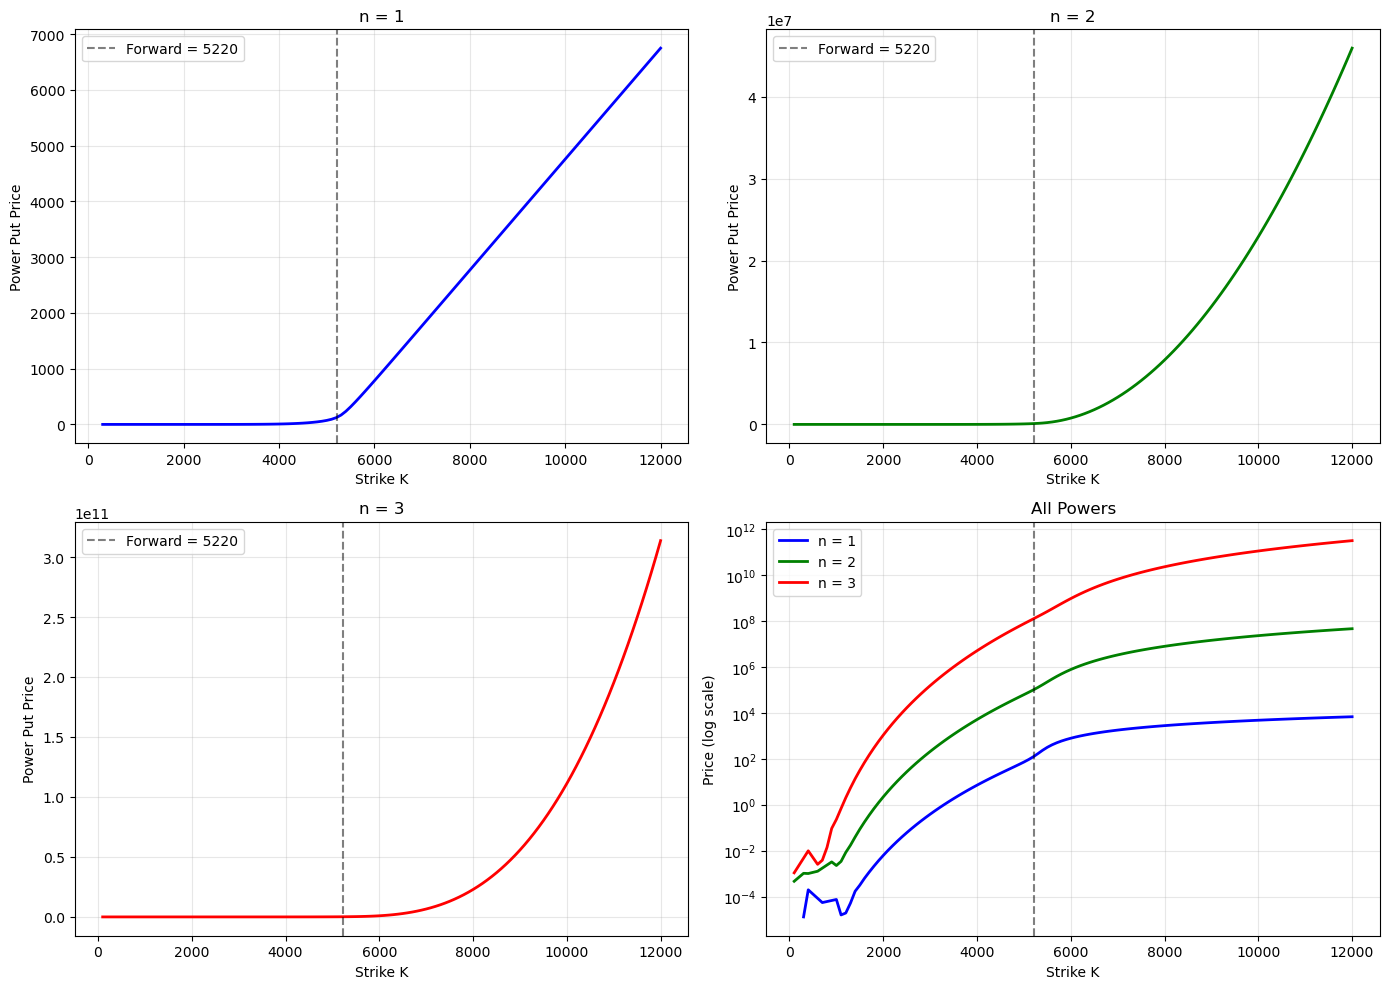

Saved: q3_power_put.csv


In [5]:
"""
HOMEWORK 3 - QUESTION 3: POWER PUT PRICING (CORRECTED)

Using the formula from Q1 solution:
Price = D * (K^n / 2π) * Σ C(n,j)(-1)^j * ∫ [j-(β+iω)]^-1 * E[(S_T/K)^(β+iω)] dω

where E[(S_T/K)^z] = K^-z * E[S_T^z] is computed via Heston characteristic function.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import differential_evolution
from scipy.special import comb

# ============================================================================
# QUESTION 3: POWER PUT PRICING 
# ============================================================================

def PowerPutPayoffFourierTransform(K, n):
    """
    Fourier transform of power put payoff [(K - e^x)^+]^n
    
    From Q4 solution:
    Ĝ_n(ω) = K^(n-iω) * Σ_{j=0}^n C(n,j) * (-1)^j / (j - iω)
    
    Valid for Im(ω) > 0
    
    This is the KEY insight: we can directly use this as payoffFourierTransform!
    """
    k = np.log(K)
    
    def Ghat(omega):
        """
        Compute Ĝ_n(ω) using the formula from Q4 solution.
        """
        iomega = 1j * omega
        
        # K^(n-iω) * Σ C(n,j) * (-1)^j / (j - iω)
        result = K**(n - iomega)
        
        sum_term = 0.0
        for j in range(n + 1):
            binomial_coeff = comb(n, j, exact=True)
            sum_term += binomial_coeff * ((-1)**j) / (j - iomega)
        
        return result * sum_term
    
    return Ghat

K_range = np.arange(100, 12001, 100)
powers = [1, 2, 3]
results = {}

# From Q1: Ĝ_n(ω) is valid for Im(ω) > 0
# From Q1: Use β < 0 to ensure Ĝ_n(ω - iβ) is defined for all real ω
#
# Analysis: For ω real and β real:
#   ω - iβ has imaginary part = Im(ω - iβ) = -β
#   We need -β > 0, so β < 0
#
beta = -0.5  # NEGATIVE beta as required by Q5 solution

for n in powers:
    print(f"\nComputing n = {n} (using β = {beta})...")
    prices = []
    valid_strikes = []
    
    for i, K in enumerate(K_range):
        if i % 20 == 0:
            print(f"  Progress: {i}/{len(K_range)}")
        
        try:
            price = HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta_cal, rho_cal,
                                        PowerPutPayoffFourierTransform(K, n), 
                                        beta=beta)
            
            if price >= 0:
                prices.append(price)
                valid_strikes.append(K)
        except Exception as e:
            print(f"    Error at K={K}: {e}")
            continue
    
    results[n] = {'strikes': np.array(valid_strikes), 
                    'prices': np.array(prices)}
    
    print(f"Computed {len(prices)} prices")
    if len(prices) >= 5:
        indices = [0, len(prices)//4, len(prices)//2, 3*len(prices)//4, -1]
        for idx in indices:
            print(f"  K={valid_strikes[idx]:6.0f}: {prices[idx]:.6e}")

# Verify monotonicity
print("\n" + "="*80)
print("MONOTONICITY CHECK")
print("="*80)
for n in powers:
    prices = results[n]['prices']
    if len(prices) > 1:
        diffs = np.diff(prices)
        num_decreases = np.sum(diffs < -1e-6)
        print(f"n={n}: Monotonically increasing? {num_decreases == 0}")
        if num_decreases > 0:
            print(f"  (Note: {num_decreases} decrease(s))")

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['blue', 'green', 'red']

for idx, n in enumerate(powers):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    
    if len(results[n]['strikes']) > 0:
        ax.plot(results[n]['strikes'], results[n]['prices'],
                color=colors[idx], linewidth=2)
        ax.axvline(F, color='black', linestyle='--', alpha=0.5,
                    label=f'Forward = {F:.0f}')
        ax.set_xlabel('Strike K')
        ax.set_ylabel('Power Put Price')
        ax.set_title(f'n = {n}')
        ax.legend()
        ax.grid(True, alpha=0.3)

ax = axes[1, 1]
for idx, n in enumerate(powers):
    if len(results[n]['strikes']) > 0:
        ax.semilogy(results[n]['strikes'], results[n]['prices'],
                    color=colors[idx], linewidth=2, label=f'n = {n}')
ax.axvline(F, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Strike K')
ax.set_ylabel('Price (log scale)')
ax.set_title('All Powers')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save CSV
max_len = max(len(results[n]['strikes']) for n in powers)
df_data = {'Strike': []}
for n in powers:
    df_data[f'Price_n{n}'] = []

for i in range(max_len):
    strike = None
    for n in powers:
        if i < len(results[n]['strikes']):
            if strike is None:
                strike = results[n]['strikes'][i]
    
    if strike is not None:
        df_data['Strike'].append(strike)
        for n in powers:
            if i < len(results[n]['strikes']) and results[n]['strikes'][i] == strike:
                df_data[f'Price_n{n}'].append(results[n]['prices'][i])
            else:
                df_data[f'Price_n{n}'].append(np.nan)

df = pd.DataFrame(df_data)
df.to_csv('q3_power_put.csv', index=False)
print("Saved: q3_power_put.csv")


# Q4